<a href="https://colab.research.google.com/github/2yoojin/capstone/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/2010~2023_water_level.csv')
rf = pd.read_csv('/content/drive/My Drive/서울 일별 강수량 (2010~2023).csv')
hazard = pd.read_csv('/content/drive/My Drive/Han River Flood Hazard Standard Water Level.csv')

observatory_codes = [1018640, 1018655, 1018658, 1018662, 1018669,
                     1018670, 1018675, 1018680, 1018683, 1018692,
                     1018695, 1018697, 1018698, 1019630]
observatory_codes = [str(code) for code in observatory_codes]

bridge_dict = {
    1018640: "Gwangjin Bridge", 1018655: "Daegok Bridge", 1018658: "Daechi Bridge",
    1018662: "Cheongdam Bridge", 1018669: "Changdong Bridge", 1018670: "Wolgye 2 Bridge",
    1018675: "Jungrang Bridge", 1018680: "Jamsu Bridge", 1018683: "Hangang Bridge",
    1018692: "Sinlim 5 Bridge", 1018695: "Neobu Bridge", 1018697: "Ogeum Bridge",
    1018698: "Sindae Bang 1 Bridge", 1019630: "Haengju Bridge"
}
bridge_names = [
    "Gwangjin Bridge", "Daegok Bridge", "Daechi Bridge", "Cheongdam Bridge",
    "Changdong Bridge", "Wolgye 2 Bridge", "Jungrang Bridge", "Jamsu Bridge",
    "Hangang Bridge", "Sinlim 5 Bridge", "Neobu Bridge", "Ogeum Bridge",
    "Sindae Bang 1 Bridge", "Haengju Bridge"
]

# observatory_codes 열의 값을 영어 다리 이름으로 대체
data['observatory'] = data['wlobscd'].map(bridge_dict)
data = pd.merge(data, hazard, how='left')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fw,wl,wlobscd,ymdhm,observatory,interest,attention,caution,serious,latitude,longitude
0,6.08,1.78,1018655,2010010100,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572
1,4.05,0.99,1018697,2010010100,Ogeum Bridge,4.0,7.0,9.0,11.1,37.508561,126.873537
2,0.76,0.12,1018695,2010010100,Neobu Bridge,1.5,3.0,4.0,4.8,37.478799,126.845860
3,NaN,NaN,1018692,2010010100,Sinlim 5 Bridge,NaN,4.4,4.8,5.3,37.481752,126.928853
4,NaN,NaN,1018698,2010010100,Sindae Bang 1 Bridge,1.3,2.3,3.2,4.4,NaN,NaN


In [ ]:
rf.fillna(0, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717002 entries, 0 to 1717001
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fw           float64
 1   wl           float64
 2   wlobscd      int64  
 3   ymdhm        int64  
 4   observatory  object 
 5   interest     float64
 6   attention    float64
 7   caution      float64
 8   serious      float64
 9   latitude     float64
 10  longitude    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 157.2+ MB


In [ ]:
data.describe()

,fw,wl,wlobscd,ymdhm,interest,attention,caution,serious,latitude,longitude
count,1.168234e+06,1.355771e+06,1.717002e+06,1.717002e+06,1.594359e+06,1.717002e+06,1.717002e+06,1.717002e+06,1.594359e+06,1.594359e+06
mean,2.882300e+02,1.276052e+00,1.018743e+06,2.016567e+09,3.138462e+00,5.978571e+00,7.478571e+00,9.264286e+00,3.753895e+01,1.269971e+02
std,8.288605e+02,9.242290e-01,2.465407e+02,4.031261e+06,1.038148e+00,1.977437e+00,2.576870e+00,3.629957e+00,5.713963e-02,9.997950e-02
min,-3.402620e+03,-2.600000e-01,1.018640e+06,2.010010e+09,1.300000e+00,2.300000e+00,3.200000e+00,4.400000e+00,3.746874e+01,1.268110e+02
25%,9.000000e-01,5.700000e-01,1.018662e+06,2.013070e+09,2.400000e+00,5.000000e+00,6.000000e+00,6.200000e+00,3.749764e+01,1.269289e+02
50%,6.110000e+00,1.070000e+00,1.018678e+06,2.016123e+09,3.000000e+00,5.500000e+00,6.750000e+00,8.200000e+00,3.751748e+01,1.270500e+02
75%,3.082400e+02,1.810000e+00,1.018695e+06,2.020070e+09,3.900000e+00,8.000000e+00,1.050000e+01,1.330000e+01,3.759248e+01,1.270705e+02
max,3.667576e+04,1.150000e+01,1.019630e+06,2.023123e+09,4.500000e+00,9.000000e+00,1.150000e+01,1.600000e+01,3.765298e+01,1.271226e+02


In [ ]:
data.isna().sum()

fw             548768
wl             361231
wlobscd             0
ymdhm               0
observatory         0
interest       122643
attention           0
caution             0
serious             0
latitude       122643
longitude      122643
dtype: int64

In [ ]:
# for bridge_name in bridge_names:
#     df = data[data['observatory'] == bridge_name]
#     df['column_name'] = df['column_name'].fillna(method='bfill', limit=None)  # 뒤의 값으로 결측치를 채우되, 값이 나타날 때까지만 보간
#     data.loc[data['observatory'] == bridge_name] = df


In [ ]:
for bridge_name in data['observatory'].unique():
    df = data[data['observatory'] == bridge_name]
    mean_fw = df['fw'].mean()
    mean_wl = df['wl'].mean()
    df['fw'].fillna(mean_fw, inplace=True)
    df['wl'].fillna(mean_wl, inplace=True)
    data.loc[data['observatory'] == bridge_name] = df
data.isna().sum()

fw             122643
wl                  0
wlobscd             0
ymdhm               0
observatory         0
interest       122643
attention           0
caution             0
serious             0
latitude       122643
longitude      122643
dtype: int64

In [ ]:
for bridge_name in bridge_names:
    df = data[data['observatory'] == bridge_name]
    print(f"Observatory: {bridge_name}")
    print(df.isna().sum())

Observatory: Gwangjin Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
interest       0
attention      0
caution        0
serious        0
latitude       0
longitude      0
dtype: int64
Observatory: Daegok Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
interest       0
attention      0
caution        0
serious        0
latitude       0
longitude      0
dtype: int64
Observatory: Daechi Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
interest       0
attention      0
caution        0
serious        0
latitude       0
longitude      0
dtype: int64
Observatory: Cheongdam Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
interest       0
attention      0
caution        0
serious        0
latitude       0
longitude      0
dtype: int64
Observatory: Changdong Bridge
fw             0
wl             0
wlobscd        0
ymdhm 

In [ ]:
# data.dropna()

In [ ]:
data['datetime'] = pd.to_datetime(data['ymdhm'], format='%Y%m%d%H')
data['date'] = data['datetime'].dt.date
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

data

,fw,wl,wlobscd,ymdhm,observatory,interest,attention,caution,serious,latitude,longitude,datetime,date,year,month,day,hour
0,6.080000,1.780000,1018655,2010010100,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
1,4.050000,0.990000,1018697,2010010100,Ogeum Bridge,4.0,7.0,9.0,11.1,37.508561,126.873537,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
2,0.760000,0.120000,1018695,2010010100,Neobu Bridge,1.5,3.0,4.0,4.8,37.478799,126.845860,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
3,NaN,2.507918,1018692,2010010100,Sinlim 5 Bridge,NaN,4.4,4.8,5.3,37.481752,126.928853,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
4,0.713282,0.578304,1018698,2010010100,Sindae Bang 1 Bridge,1.3,2.3,3.2,4.4,NaN,NaN,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716997,9.000000,0.800000,1018697,2023123123,Ogeum Bridge,4.0,7.0,9.0,11.1,37.508561,126.873537,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1716998,0.320000,0.570000,1018698,2023123123,Sindae Bang 1 Bridge,1.3,2.3,3.2,4.4,NaN,NaN,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1716999,124.870000,1.130000,1018640,2023123123,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1717000,264.070000,1.030000,1018662,2023123123,Cheongdam Bridge,3.0,9.0,11.5,16.0,37.526074,127.064246,2023-12-31 23:00:00,2023-12-31,2023,12,31,23


In [ ]:
rf.rename(columns={'datetime' : 'date'}, inplace=True)
rf

,date,location,precipitation(mm)
0,2010-01-01,108,0.0
1,2010-01-02,108,1.4
2,2010-01-03,108,0.0
3,2010-01-04,108,14.2
4,2010-01-05,108,0.0
...,...,...,...
5108,2023-12-27,108,0.0
5109,2023-12-28,108,0.0
5110,2023-12-29,108,0.0
5111,2023-12-30,108,13.1


In [ ]:
data.isna().sum()

fw             122643
wl                  0
wlobscd             0
ymdhm               0
observatory         0
interest       122643
attention           0
caution             0
serious             0
latitude       122643
longitude      122643
datetime            0
date                0
year                0
month               0
day                 0
hour                0
dtype: int64

In [ ]:
data.dropna(inplace=True)
# data.to_csv('HanRiver(2010~2023).csv', encoding='utf-8', index=False)

In [ ]:
data['date']
rf['precipitation(mm)']

0        0.0
1        1.4
2        0.0
3       14.2
4        0.0
        ... 
5108     0.0
5109     0.0
5110     0.0
5111    13.1
5112     4.7
Name: precipitation(mm), Length: 5113, dtype: float64

In [ ]:
import pandas as pd

# rf 데이터프레임을 datetime 형식으로 변환
rf['datetime'] = pd.to_datetime(rf['date'])

# 각 날짜에 대해 24시간 동안의 강수량을 생성하고 시간 정보 설정
rf_full_day = pd.DataFrame(columns=['datetime', 'precipitation(mm)'])
for date in rf['date'].unique():
    date_data = pd.DataFrame()
    date_data['datetime'] = pd.date_range(start=date, periods=24, freq='H')
    date_data['precipitation(mm)'] = rf.loc[rf['date'] == date, 'precipitation(mm)'].values[0]
    rf_full_day = pd.concat([rf_full_day, date_data])

# 필요한 열만 선택하여 출력
rf_full_day.reset_index(drop=True, inplace=True)
rf_full_day


,datetime,precipitation(mm)
0,2010-01-01 00:00:00,0.0
1,2010-01-01 01:00:00,0.0
2,2010-01-01 02:00:00,0.0
3,2010-01-01 03:00:00,0.0
4,2010-01-01 04:00:00,0.0
...,...,...
122707,2023-12-31 19:00:00,4.7
122708,2023-12-31 20:00:00,4.7
122709,2023-12-31 21:00:00,4.7
122710,2023-12-31 22:00:00,4.7


In [ ]:
observatory_list = []
for observatory in data['observatory'].unique():
    df = data[data['observatory'] == observatory]
    merged_data = pd.merge(df, rf_full_day, on='datetime', how='left')
    observatory_list.append(merged_data)

result_df = pd.concat(observatory_list)
result_df

,fw,wl,wlobscd,ymdhm,observatory,interest,attention,caution,serious,latitude,longitude,datetime,date,year,month,day,hour,precipitation(mm)
0,6.08,1.78,1018655,2010010100,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 00:00:00,2010-01-01,2010,1,1,0,0.0
1,6.08,1.78,1018655,2010010101,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 01:00:00,2010-01-01,2010,1,1,1,0.0
2,6.08,1.78,1018655,2010010102,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 02:00:00,2010-01-01,2010,1,1,2,0.0
3,6.08,1.78,1018655,2010010103,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 03:00:00,2010-01-01,2010,1,1,3,0.0
4,6.08,1.78,1018655,2010010104,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 04:00:00,2010-01-01,2010,1,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122638,128.90,1.13,1018640,2023123119,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 19:00:00,2023-12-31,2023,12,31,19,4.7
122639,124.87,1.13,1018640,2023123120,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 20:00:00,2023-12-31,2023,12,31,20,4.7
122640,124.87,1.13,1018640,2023123121,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 21:00:00,2023-12-31,2023,12,31,21,4.7
122641,128.90,1.13,1018640,2023123122,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 22:00:00,2023-12-31,2023,12,31,22,4.7


In [ ]:
data = result_df
data

,fw,wl,wlobscd,ymdhm,observatory,interest,attention,caution,serious,latitude,longitude,datetime,date,year,month,day,hour,precipitation(mm)
0,6.08,1.78,1018655,2010010100,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 00:00:00,2010-01-01,2010,1,1,0,0.0
1,6.08,1.78,1018655,2010010101,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 01:00:00,2010-01-01,2010,1,1,1,0.0
2,6.08,1.78,1018655,2010010102,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 02:00:00,2010-01-01,2010,1,1,2,0.0
3,6.08,1.78,1018655,2010010103,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 03:00:00,2010-01-01,2010,1,1,3,0.0
4,6.08,1.78,1018655,2010010104,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 04:00:00,2010-01-01,2010,1,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122638,128.90,1.13,1018640,2023123119,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 19:00:00,2023-12-31,2023,12,31,19,4.7
122639,124.87,1.13,1018640,2023123120,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 20:00:00,2023-12-31,2023,12,31,20,4.7
122640,124.87,1.13,1018640,2023123121,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 21:00:00,2023-12-31,2023,12,31,21,4.7
122641,128.90,1.13,1018640,2023123122,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 22:00:00,2023-12-31,2023,12,31,22,4.7


In [ ]:
# data.drop('rf', axis=1, inplace=True)
data.rename(columns={ 'precipitation(mm)' : 'rf'}, inplace=True)
data

,fw,wl,wlobscd,ymdhm,observatory,interest,attention,caution,serious,latitude,longitude,datetime,date,year,month,day,hour,rf
0,6.08,1.78,1018655,2010010100,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 00:00:00,2010-01-01,2010,1,1,0,0.0
1,6.08,1.78,1018655,2010010101,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 01:00:00,2010-01-01,2010,1,1,1,0.0
2,6.08,1.78,1018655,2010010102,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 02:00:00,2010-01-01,2010,1,1,2,0.0
3,6.08,1.78,1018655,2010010103,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 03:00:00,2010-01-01,2010,1,1,3,0.0
4,6.08,1.78,1018655,2010010104,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-01-01 04:00:00,2010-01-01,2010,1,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122638,128.90,1.13,1018640,2023123119,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 19:00:00,2023-12-31,2023,12,31,19,4.7
122639,124.87,1.13,1018640,2023123120,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 20:00:00,2023-12-31,2023,12,31,20,4.7
122640,124.87,1.13,1018640,2023123121,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 21:00:00,2023-12-31,2023,12,31,21,4.7
122641,128.90,1.13,1018640,2023123122,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-12-31 22:00:00,2023-12-31,2023,12,31,22,4.7


In [ ]:
# data.drop('situation', axis=1, inplace=True)

In [ ]:
data['warning level'] = 'normal'
data.loc[data['wl'] >= data['interest'], 'warning level'] = 'interest'
data.loc[data['wl'] >= data['attention'], 'warning level'] = 'attention'
data.loc[data['wl'] >= data['caution'], 'warning level'] = 'caution'
data.loc[data['wl'] >= data['serious'], 'warning level'] = 'serious'


In [ ]:
data[data['wl'] >= data['interest']]

,fw,wl,wlobscd,ymdhm,observatory,interest,attention,caution,serious,latitude,longitude,datetime,date,year,month,day,hour,rf,warning level
4740,436.42,3.83,1018655,2010071712,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-07-17 12:00:00,2010-07-17,2010,7,17,12,89.5,interest
5515,493.31,3.95,1018655,2010081819,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-08-18 19:00:00,2010-08-18,2010,8,18,19,19.5,interest
5772,798.29,4.55,1018655,2010082912,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-08-29 12:00:00,2010-08-29,2010,8,29,12,99.0,interest
5773,814.94,4.58,1018655,2010082913,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-08-29 13:00:00,2010-08-29,2010,8,29,13,99.0,interest
5774,733.00,4.43,1018655,2010082914,Daegok Bridge,3.8,5.5,7.0,8.5,37.468742,127.122572,2010-08-29 14:00:00,2010-08-29,2010,8,29,14,99.0,interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118618,6865.76,3.44,1018640,2023071707,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-07-17 07:00:00,2023-07-17,2023,7,17,7,1.4,interest
118619,6715.87,3.40,1018640,2023071708,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-07-17 08:00:00,2023-07-17,2023,7,17,8,1.4,interest
118620,6461.26,3.38,1018640,2023071709,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-07-17 09:00:00,2023-07-17,2023,7,17,9,1.4,interest
118621,6111.39,3.24,1018640,2023071710,Gwangjin Bridge,3.0,8.0,10.5,13.6,37.542950,127.113154,2023-07-17 10:00:00,2023-07-17,2023,7,17,10,1.4,interest


In [ ]:
# for bridge_name in data['observatory'].unique():
#     df = data[data['observatory'] == bridge_name]
#     print(bridge_name)
#     print('  Normal :' + str(len(df[df['warning level']=='normal'])/len(df) * 100) + '%' )
#     print('  Attention :' + str(len(df[df['warning level']=='attention'])/len(df) * 100) + '%' )
#     print('  Caution :' + str(len(df[df['warning level']=='caution'])/len(df) * 100)+ '%' )
#     print('  Serious :' + str(len(df[df['warning level']=='serious'])/len(df) * 100) + '%' )


In [ ]:
data[data['observatory'] == 'Sinlim 5 Bridge']

,fw,wl,wlobscd,ymdhm,observatory,interest,attention,caution,serious,latitude,longitude,datetime,date,year,month,day,hour,rf,warning level


In [ ]:
for bridge_name in data['observatory'].unique():
    df = data[data['observatory'] == bridge_name]
    print(bridge_name)
    print('  {:<10s} : {:.2f}%'.format('Normal', len(df[df['warning level'] == 'normal']) / len(df) * 100))
    print('  {:<10s} : {:.2f}%'.format('Interest', len(df[df['warning level'] == 'interest']) / len(df) * 100))
    print('  {:<10s} : {:.2f}%'.format('Attention', len(df[df['warning level'] == 'attention']) / len(df) * 100))
    print('  {:<10s} : {:.2f}%'.format('Caution', len(df[df['warning level'] == 'caution']) / len(df) * 100))
    print('  {:<10s} : {:.2f}%'.format('Serious', len(df[df['warning level'] == 'serious']) / len(df) * 100))


Daegok Bridge
  Normal     : 99.80%
  Interest   : 0.18%
  Attention  : 0.03%
  Caution    : 0.00%
  Serious    : 0.00%
Ogeum Bridge
  Normal     : 99.59%
  Interest   : 0.40%
  Attention  : 0.01%
  Caution    : 0.00%
  Serious    : 0.00%
Neobu Bridge
  Normal     : 99.38%
  Interest   : 0.56%
  Attention  : 0.05%
  Caution    : 0.01%
  Serious    : 0.00%
Haengju Bridge
  Normal     : 99.19%
  Interest   : 0.74%
  Attention  : 0.06%
  Caution    : 0.01%
  Serious    : 0.00%
Daechi Bridge
  Normal     : 99.49%
  Interest   : 0.51%
  Attention  : 0.00%
  Caution    : 0.00%
  Serious    : 0.00%
Jamsu Bridge
  Normal     : 93.40%
  Interest   : 5.24%
  Attention  : 0.57%
  Caution    : 0.12%
  Serious    : 0.67%
Hangang Bridge
  Normal     : 99.21%
  Interest   : 0.78%
  Attention  : 0.00%
  Caution    : 0.00%
  Serious    : 0.00%
Wolgye 2 Bridge
  Normal     : 99.67%
  Interest   : 0.33%
  Attention  : 0.00%
  Caution    : 0.00%
  Serious    : 0.00%
Changdong Bridge
  Normal     : 99.98%


In [ ]:
import pandas as pd

# 다리별로 정상, 관심, 주의, 경계, 심각 수준의 백분율을 담은 딕셔너리 생성
warning_level = {
    'Bridge': ['Daegok Bridge', 'Ogeum Bridge', 'Neobu Bridge', 'Sindae Bang 1 Bridge', 'Haengju Bridge',
               'Daechi Bridge', 'Jamsu Bridge', 'Hangang Bridge', 'Wolgye 2 Bridge', 'Changdong Bridge',
               'Cheongdam Bridge', 'Jungrang Bridge', 'Gwangjin Bridge'],
    'Normal': [99.80, 99.59, 99.38, 99.99, 99.19, 99.49, 93.40, 99.21, 99.67, 99.98, 97.21, 99.80, 99.31],
    'Interest': [0.18, 0.40, 0.56, 0.01, 0.74, 0.51, 5.24, 0.78, 0.33, 0.02, 2.73, 0.20, 0.68],
    'Attention': [0.03, 0.01, 0.05, 0.00, 0.06, 0.00, 0.57, 0.00, 0.00, 0.00, 0.06, 0.00, 0.00],
    'Caution': [0.00, 0.00, 0.01, 0.00, 0.01, 0.00, 0.12, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'Serious': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.67, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
}

# 데이터프레임 생성
df_wl = pd.DataFrame(warning_level)

# 다리명을 인덱스로 설정
df_wl.set_index('Bridge', inplace=True)

df_wl

,Normal,Interest,Attention,Caution,Serious
Bridge,,,,,
Daegok Bridge,99.80,0.18,0.03,0.00,0.00
Ogeum Bridge,99.59,0.40,0.01,0.00,0.00
Neobu Bridge,99.38,0.56,0.05,0.01,0.00
Sindae Bang 1 Bridge,99.99,0.01,0.00,0.00,0.00
Haengju Bridge,99.19,0.74,0.06,0.01,0.00
Daechi Bridge,99.49,0.51,0.00,0.00,0.00
Jamsu Bridge,93.40,5.24,0.57,0.12,0.67
Hangang Bridge,99.21,0.78,0.00,0.00,0.00
Wolgye 2 Bridge,99.67,0.33,0.00,0.00,0.00


In [ ]:
# for bridge_name in bridge_names:
#     df = data[data['observatory'] == bridge_name]
#     print(f"Observatory: {bridge_name}")
#     print(df.isna().sum())a

Daegok Bridge Complite
Ogeum Bridge Complite
Neobu Bridge Complite
Haengju Bridge Complite
Daechi Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Wolgye 2 Bridge Complite
Changdong Bridge Complite
Cheongdam Bridge Complite
Jungrang Bridge Complite
Gwangjin Bridge Complite


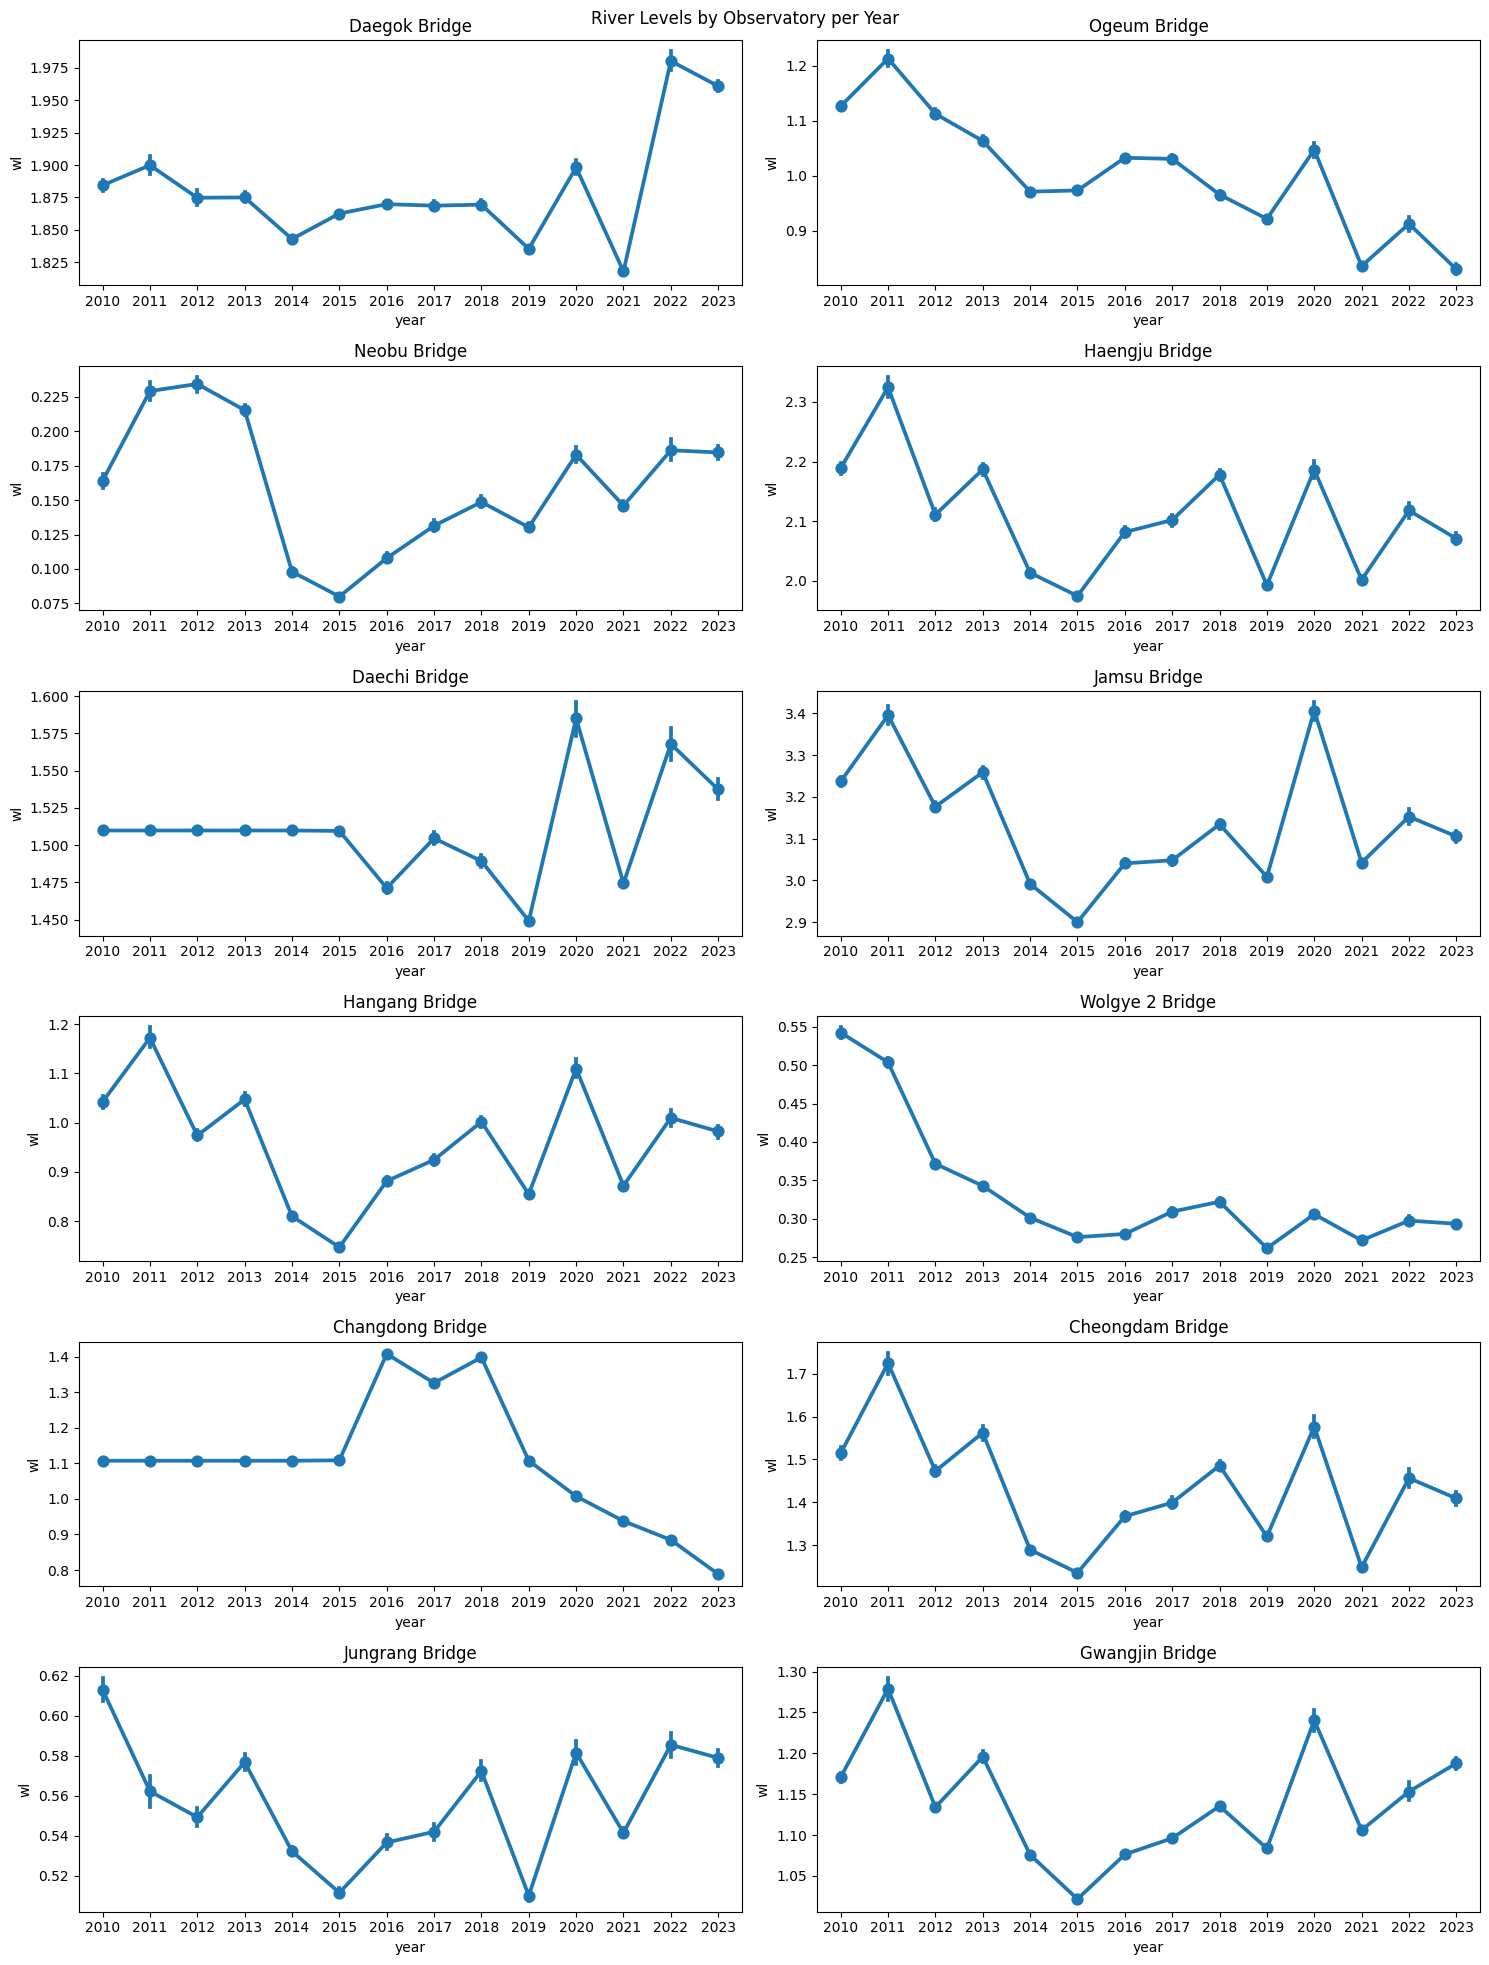

In [ ]:
num_features = len(data['observatory'].unique())
num_rows = 6
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(data['observatory'].unique()):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='year', y='wl', data=df, ax=axes[row, col])
#     axes[row, col].boxplot(df['level'])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory per Year')
plt.tight_layout()
plt.show()

Daegok Bridge Complite
Ogeum Bridge Complite
Neobu Bridge Complite
Haengju Bridge Complite
Daechi Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Wolgye 2 Bridge Complite
Changdong Bridge Complite
Cheongdam Bridge Complite
Jungrang Bridge Complite
Gwangjin Bridge Complite


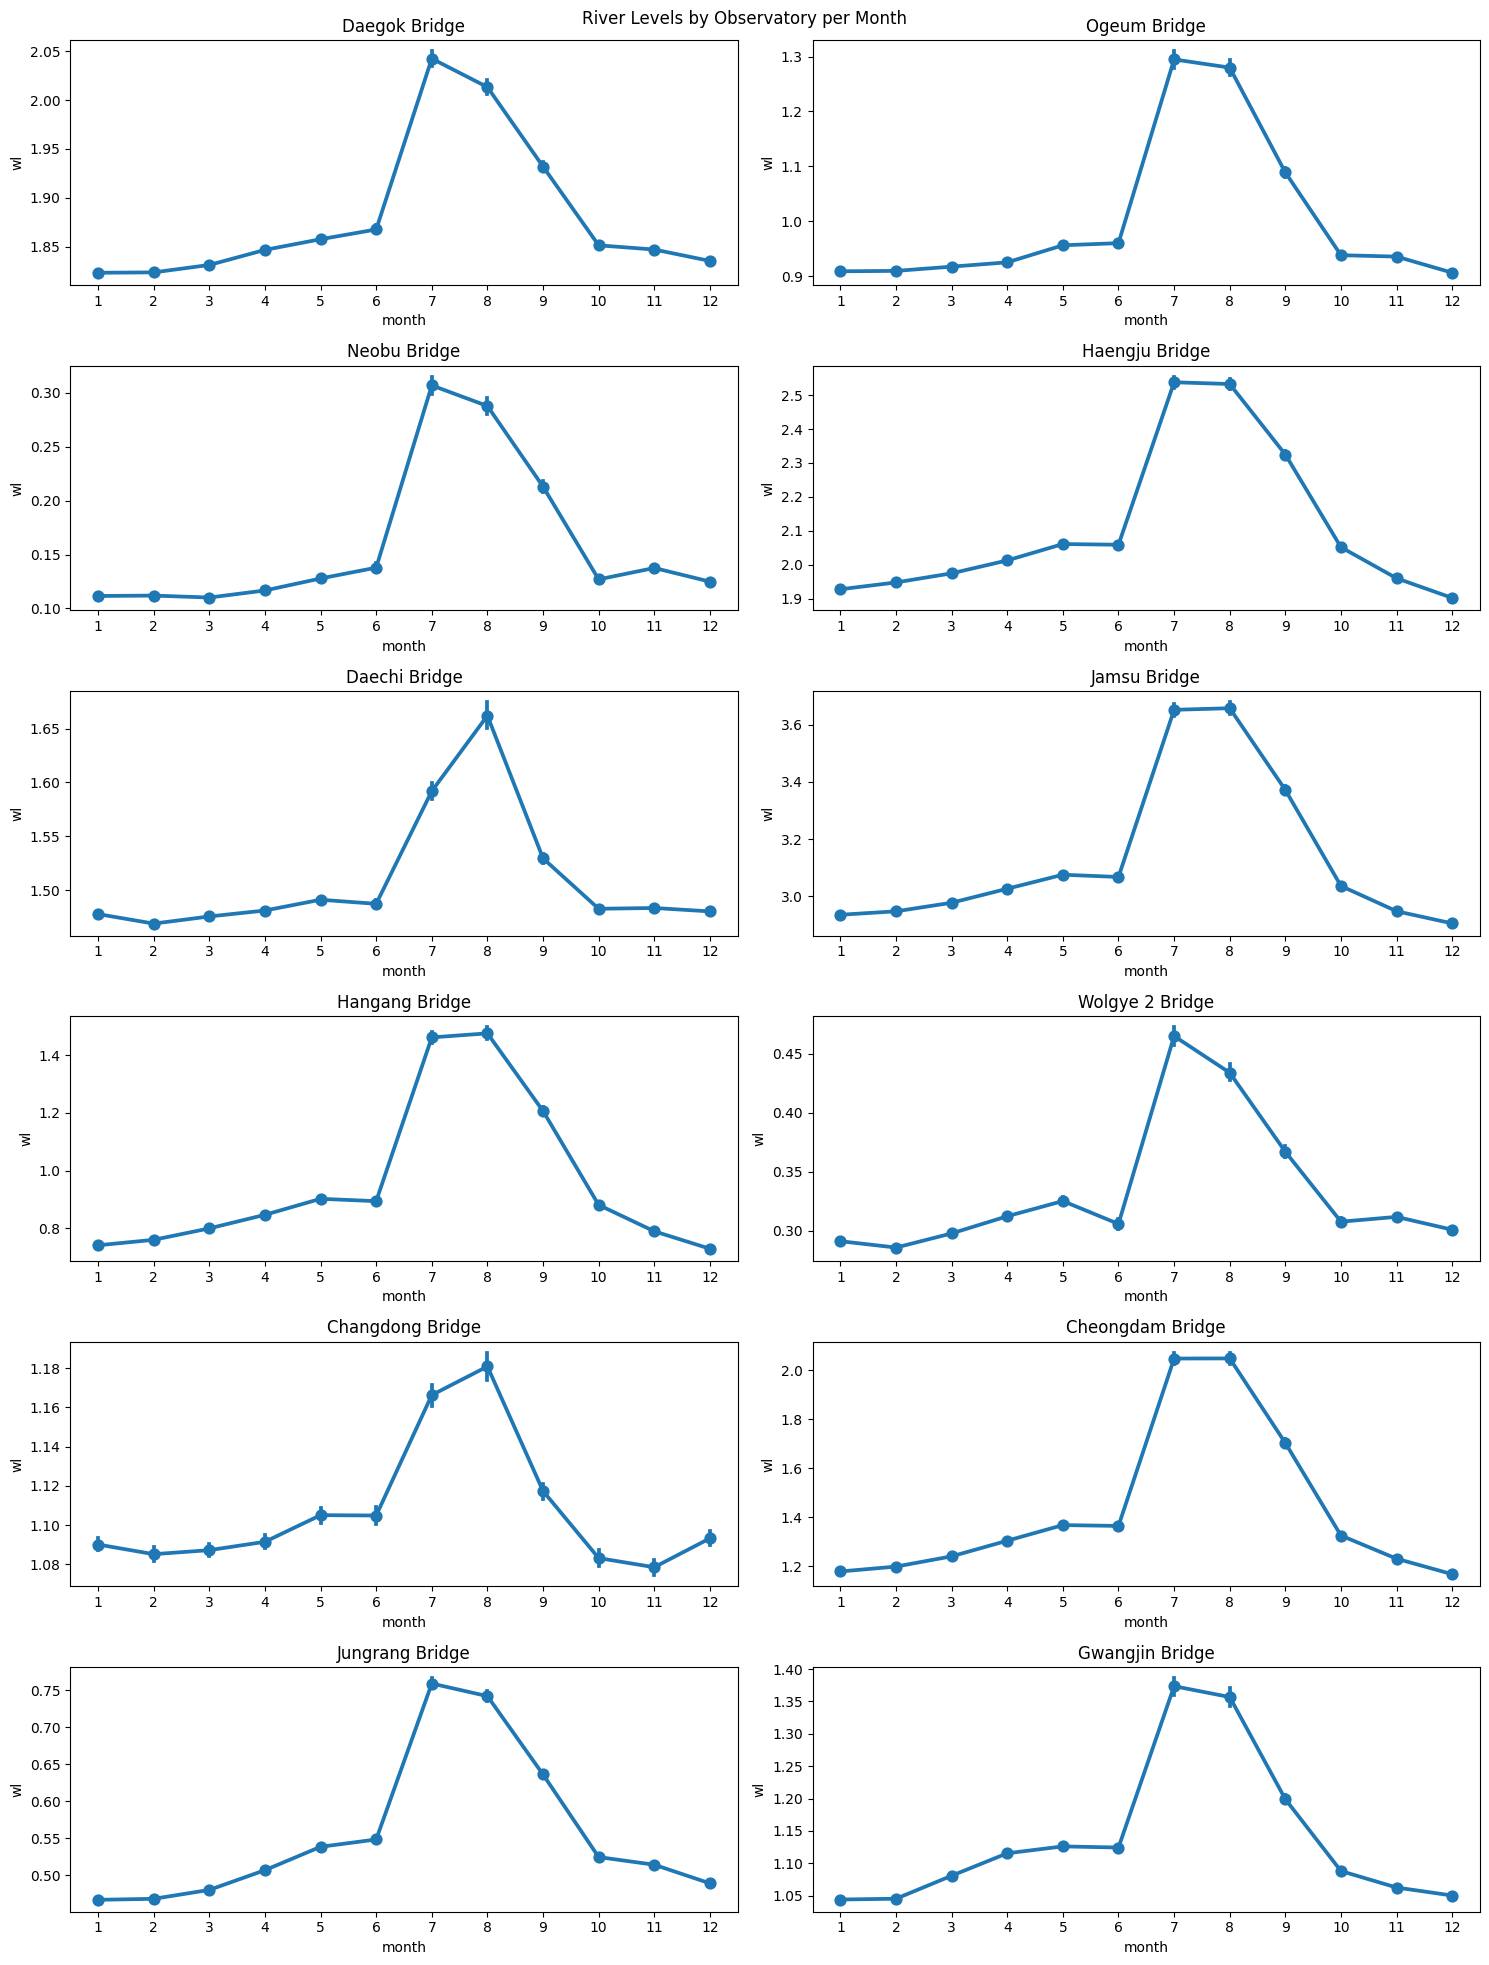

In [ ]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(data['observatory'].unique()):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='month', y='wl', data=df, ax=axes[row, col])
#     axes[row, col].boxplot(df['level'])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory per Month')
plt.tight_layout()
plt.show()

Daegok Bridge Complite
Ogeum Bridge Complite
Neobu Bridge Complite
Haengju Bridge Complite
Daechi Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Wolgye 2 Bridge Complite
Changdong Bridge Complite
Cheongdam Bridge Complite
Jungrang Bridge Complite
Gwangjin Bridge Complite


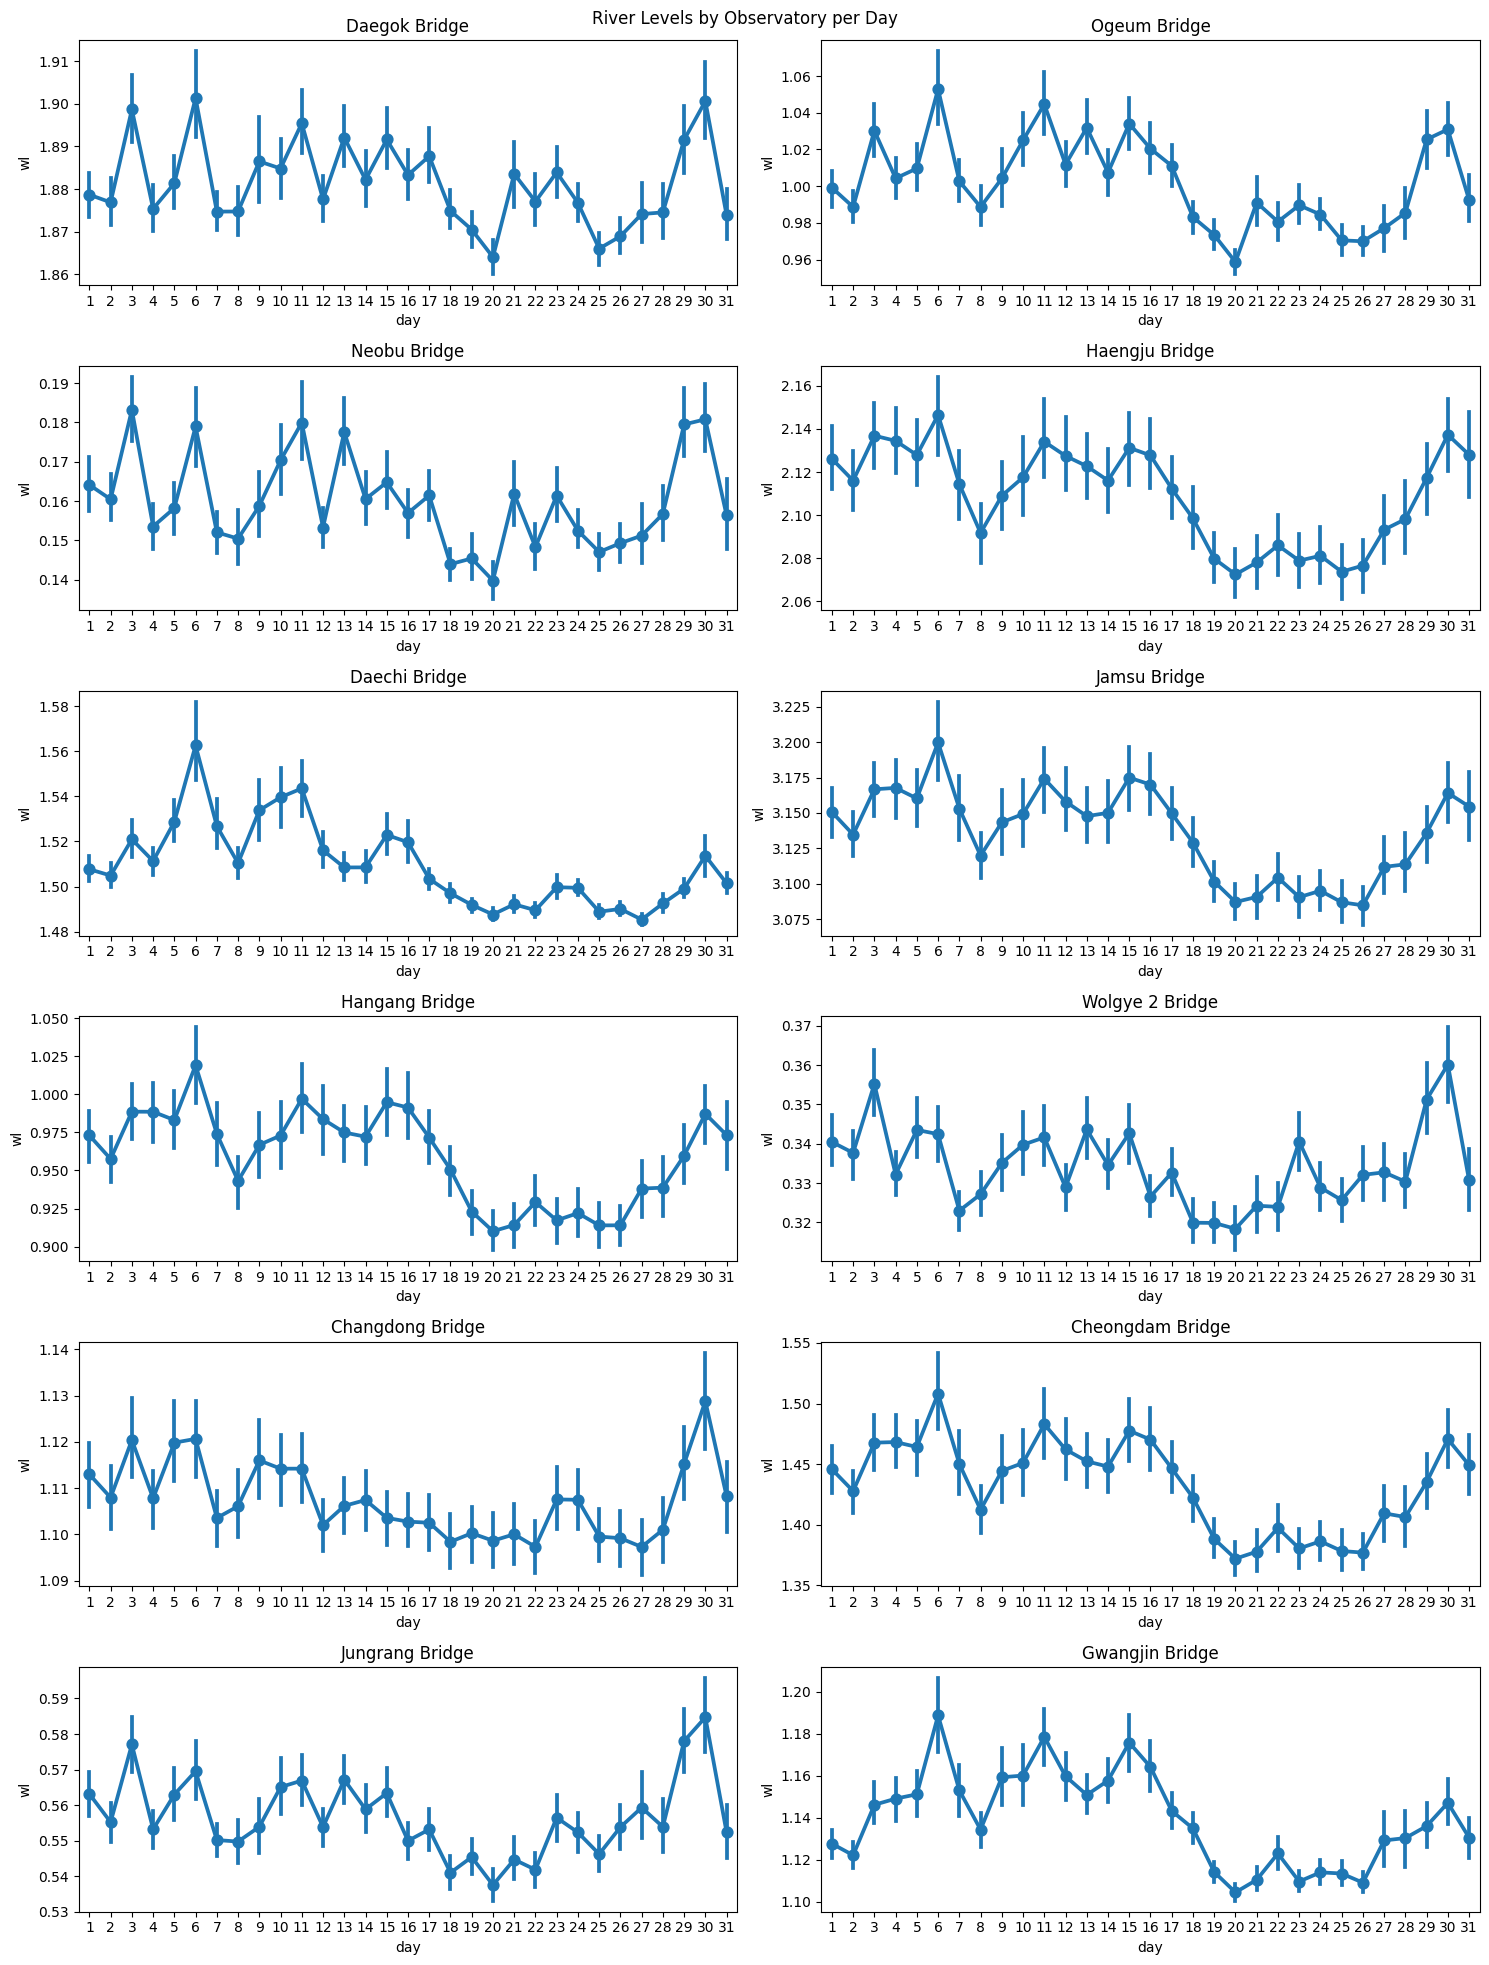

In [ ]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(data['observatory'].unique()):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='day', y='wl', data=df, ax=axes[row, col])
#     axes[row, col].boxplot(df['level'])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory per Day')
plt.tight_layout()
plt.show()

Daegok Bridge Complite
Ogeum Bridge Complite
Neobu Bridge Complite
Haengju Bridge Complite
Daechi Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Wolgye 2 Bridge Complite
Changdong Bridge Complite
Cheongdam Bridge Complite
Jungrang Bridge Complite
Gwangjin Bridge Complite


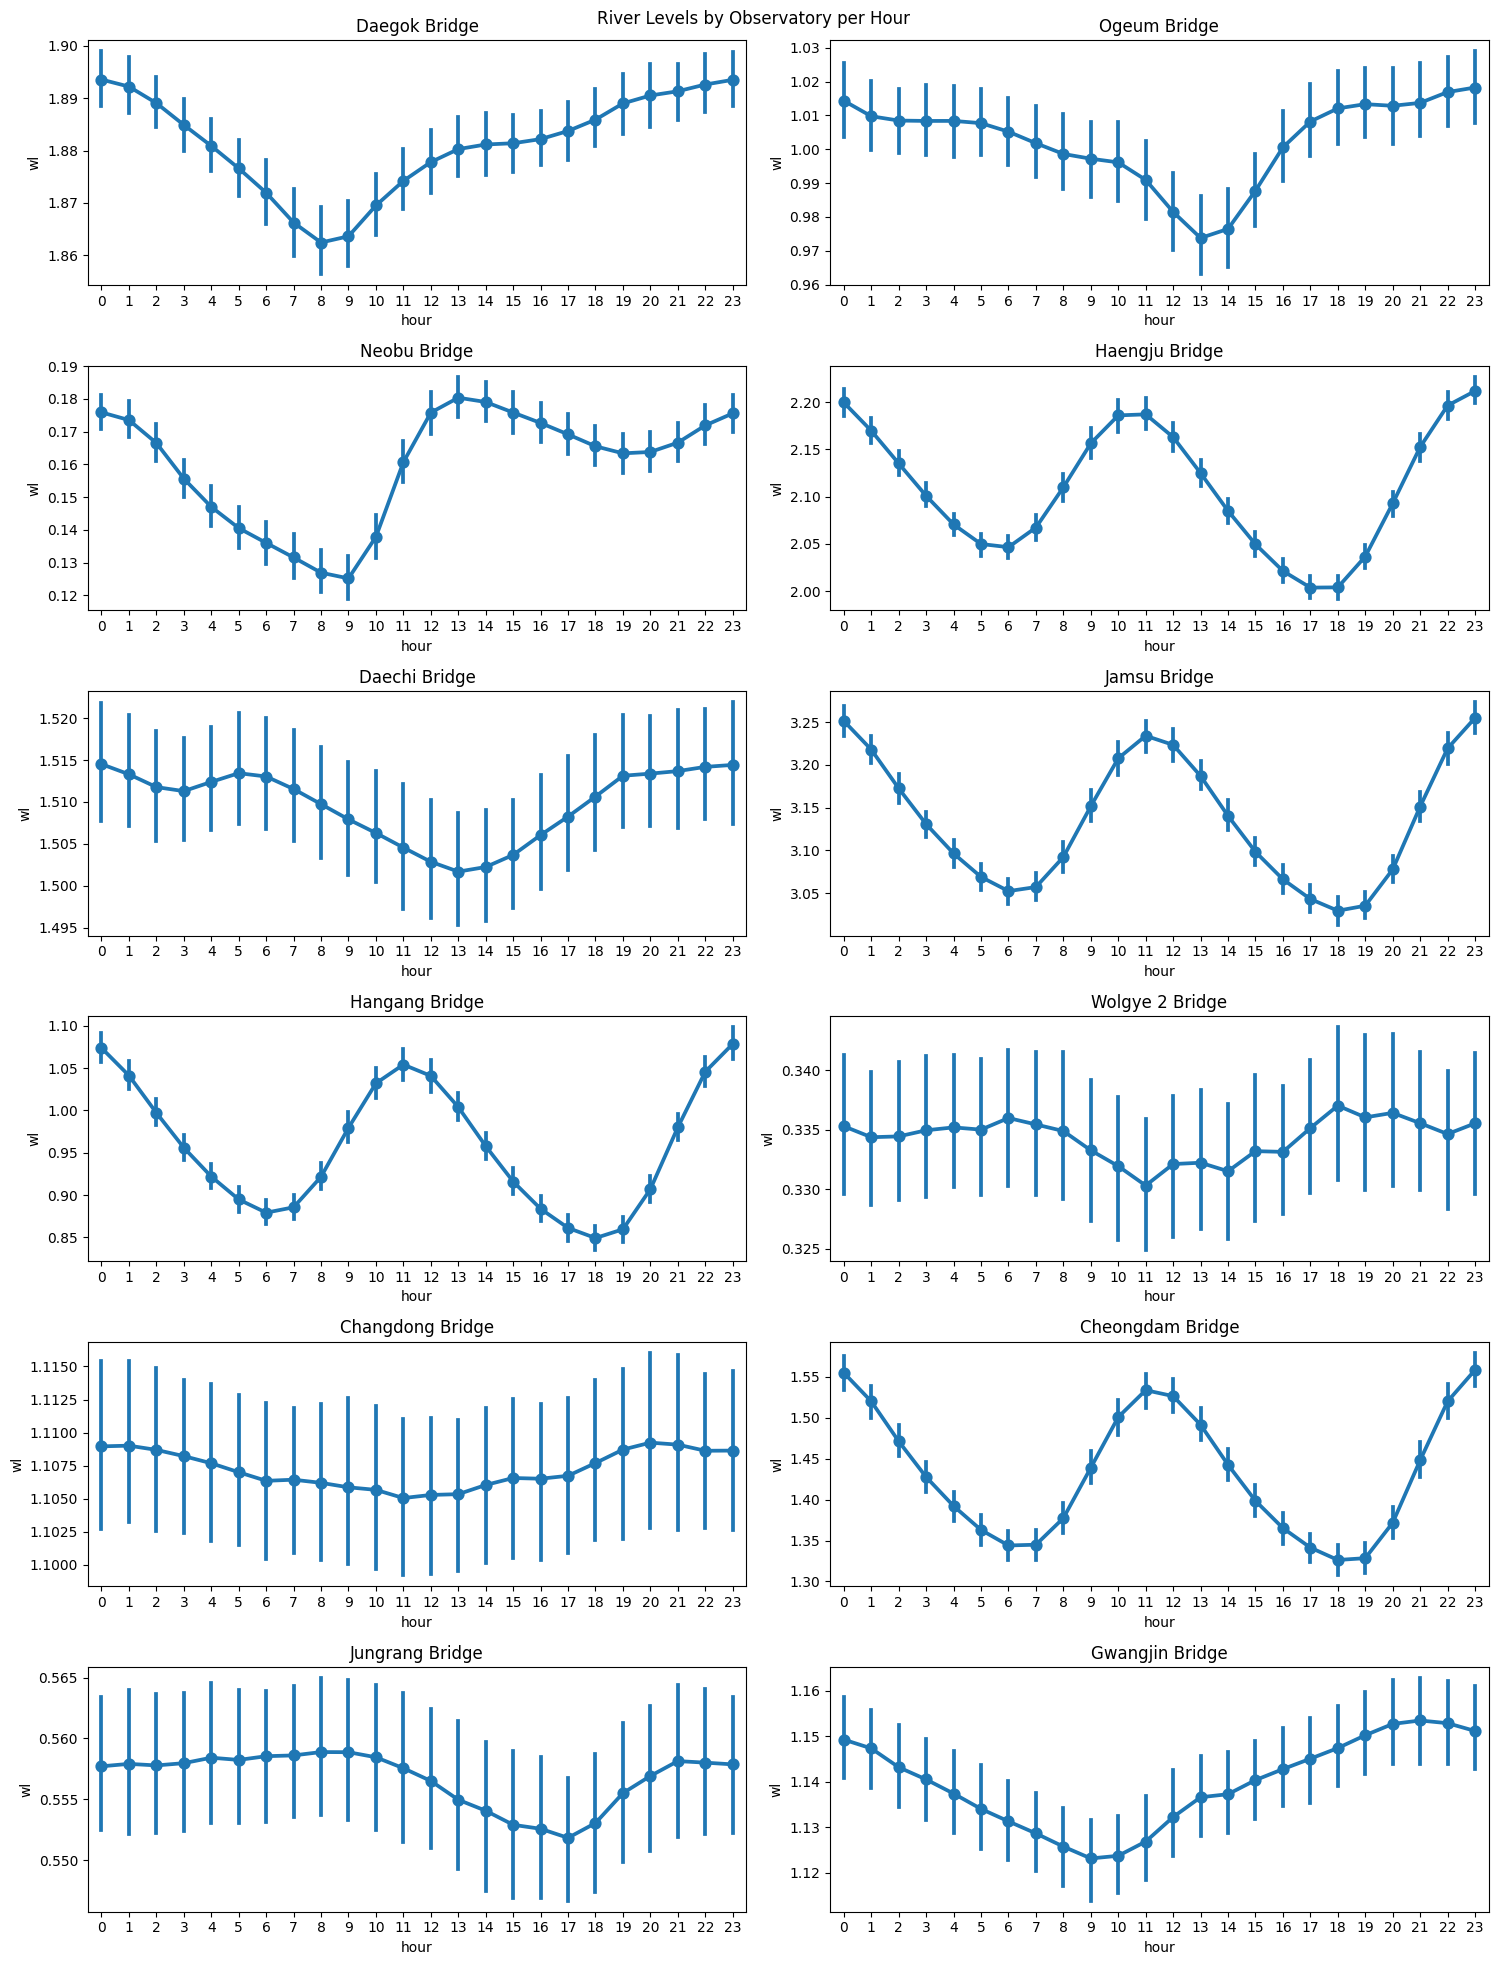

In [ ]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(data['observatory'].unique()):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='hour', y='wl', data=df, ax=axes[row, col])
#     axes[row, col].boxplot(df['level'])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory per Hour')
plt.tight_layout()
plt.show()

Daegok Bridge Complite
Ogeum Bridge Complite
Neobu Bridge Complite
Haengju Bridge Complite
Daechi Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Wolgye 2 Bridge Complite
Changdong Bridge Complite
Cheongdam Bridge Complite
Jungrang Bridge Complite
Gwangjin Bridge Complite


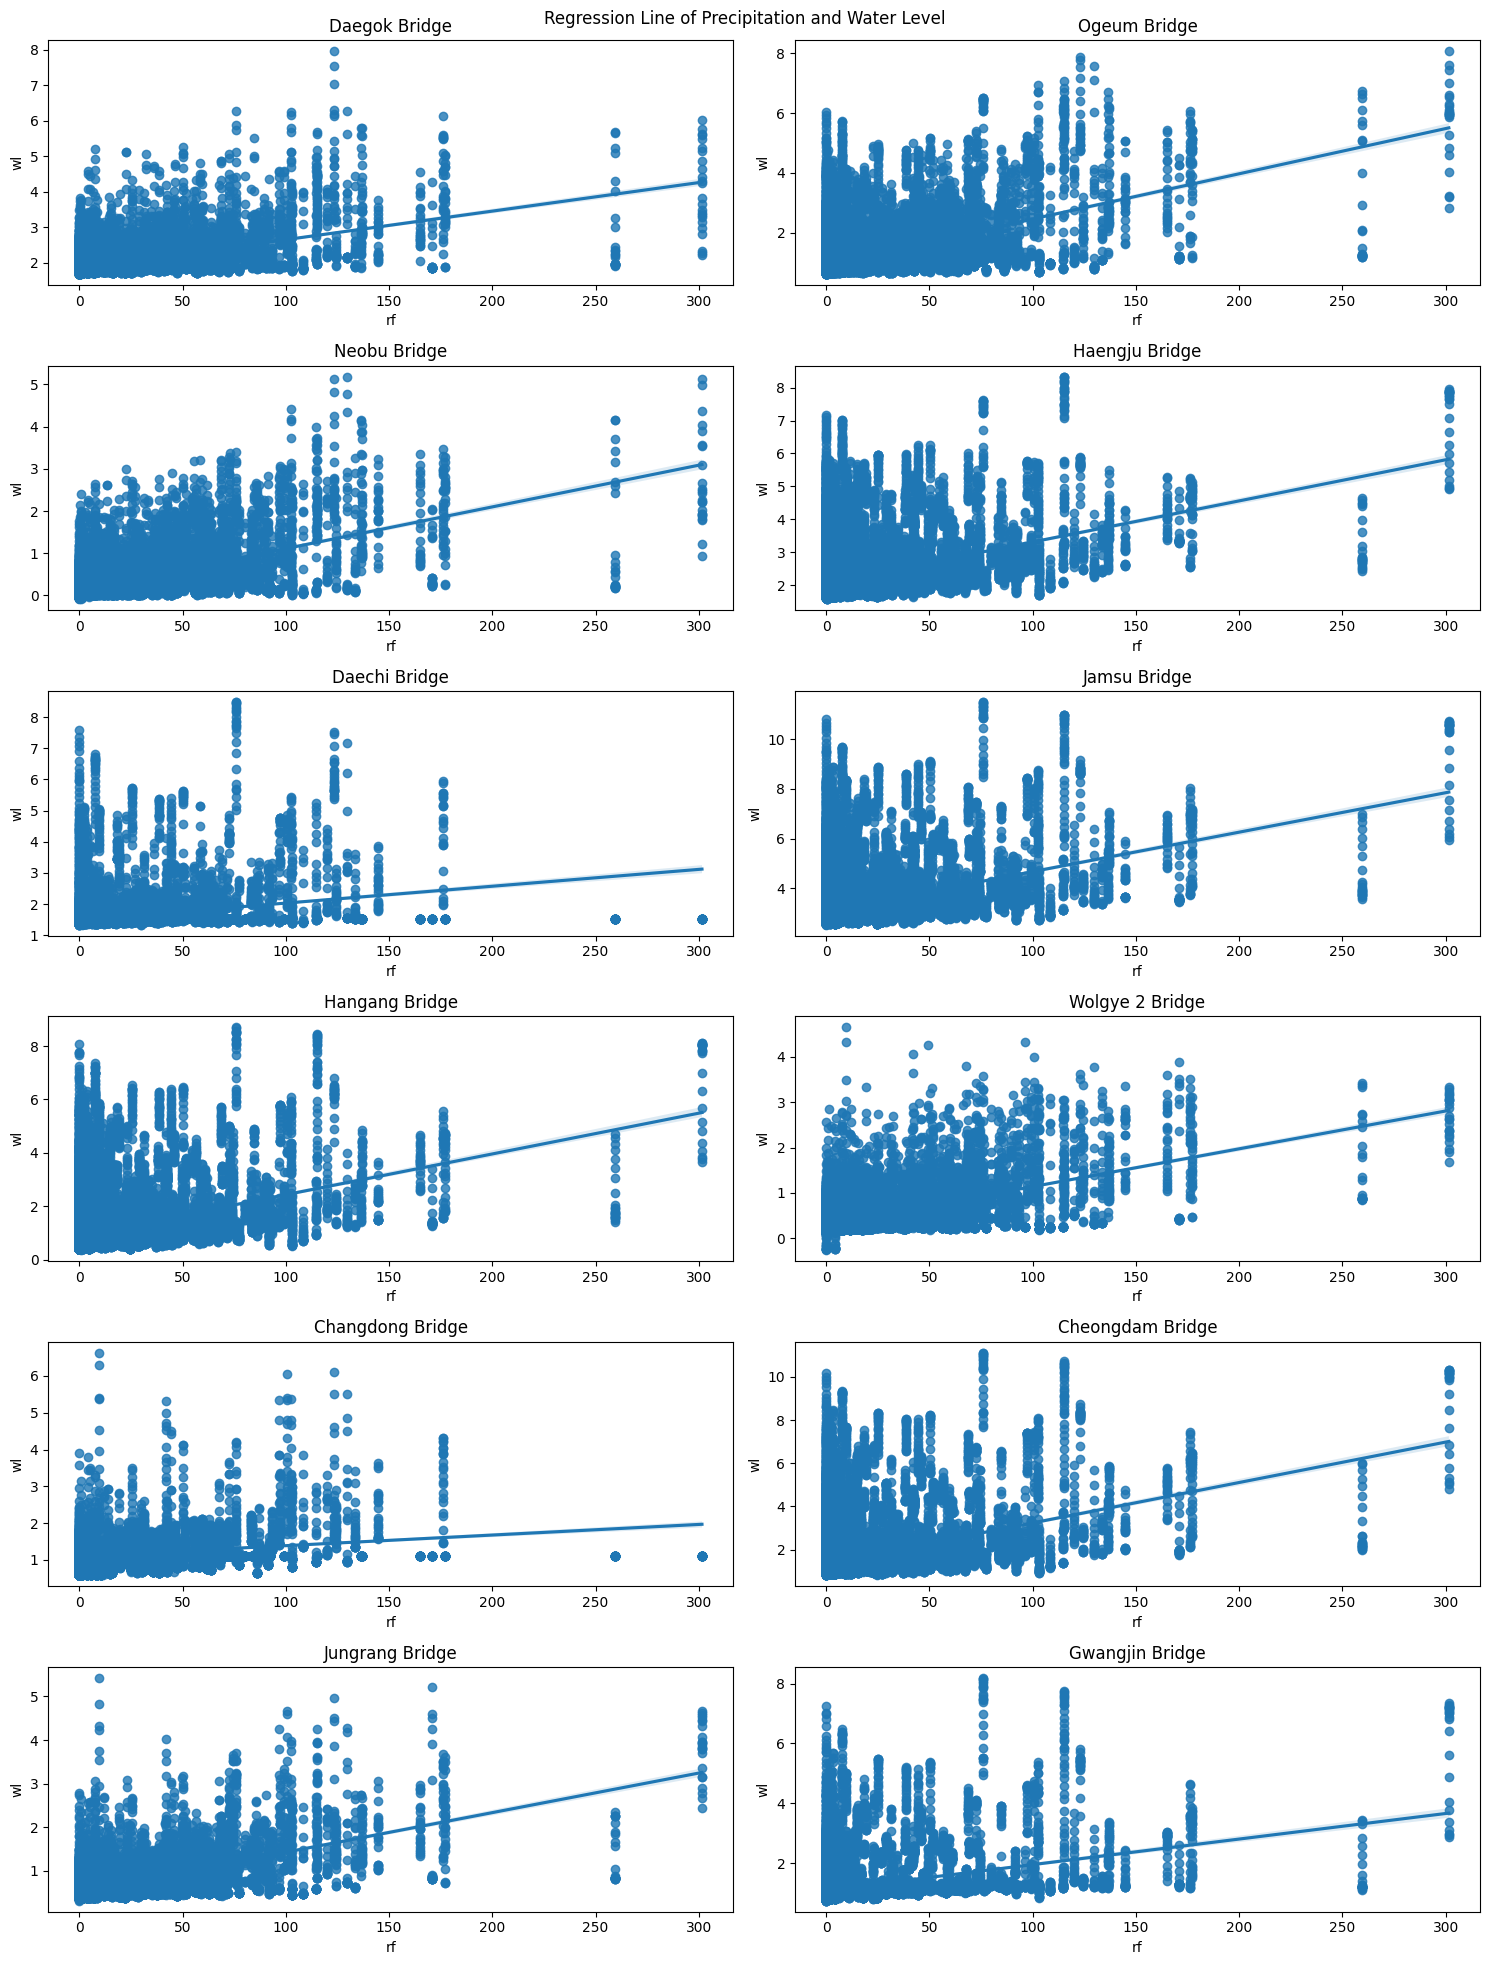

In [ ]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(data['observatory'].unique()):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.regplot(x='rf', y='wl', data=df, ax=axes[row, col])
#     axes[row, col].boxplot(df['level'])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('Regression Line of Precipitation and Water Level')
plt.tight_layout()
plt.show()

Daegok Bridge Complite
Ogeum Bridge Complite
Neobu Bridge Complite
Haengju Bridge Complite
Daechi Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Wolgye 2 Bridge Complite
Changdong Bridge Complite
Cheongdam Bridge Complite
Jungrang Bridge Complite
Gwangjin Bridge Complite


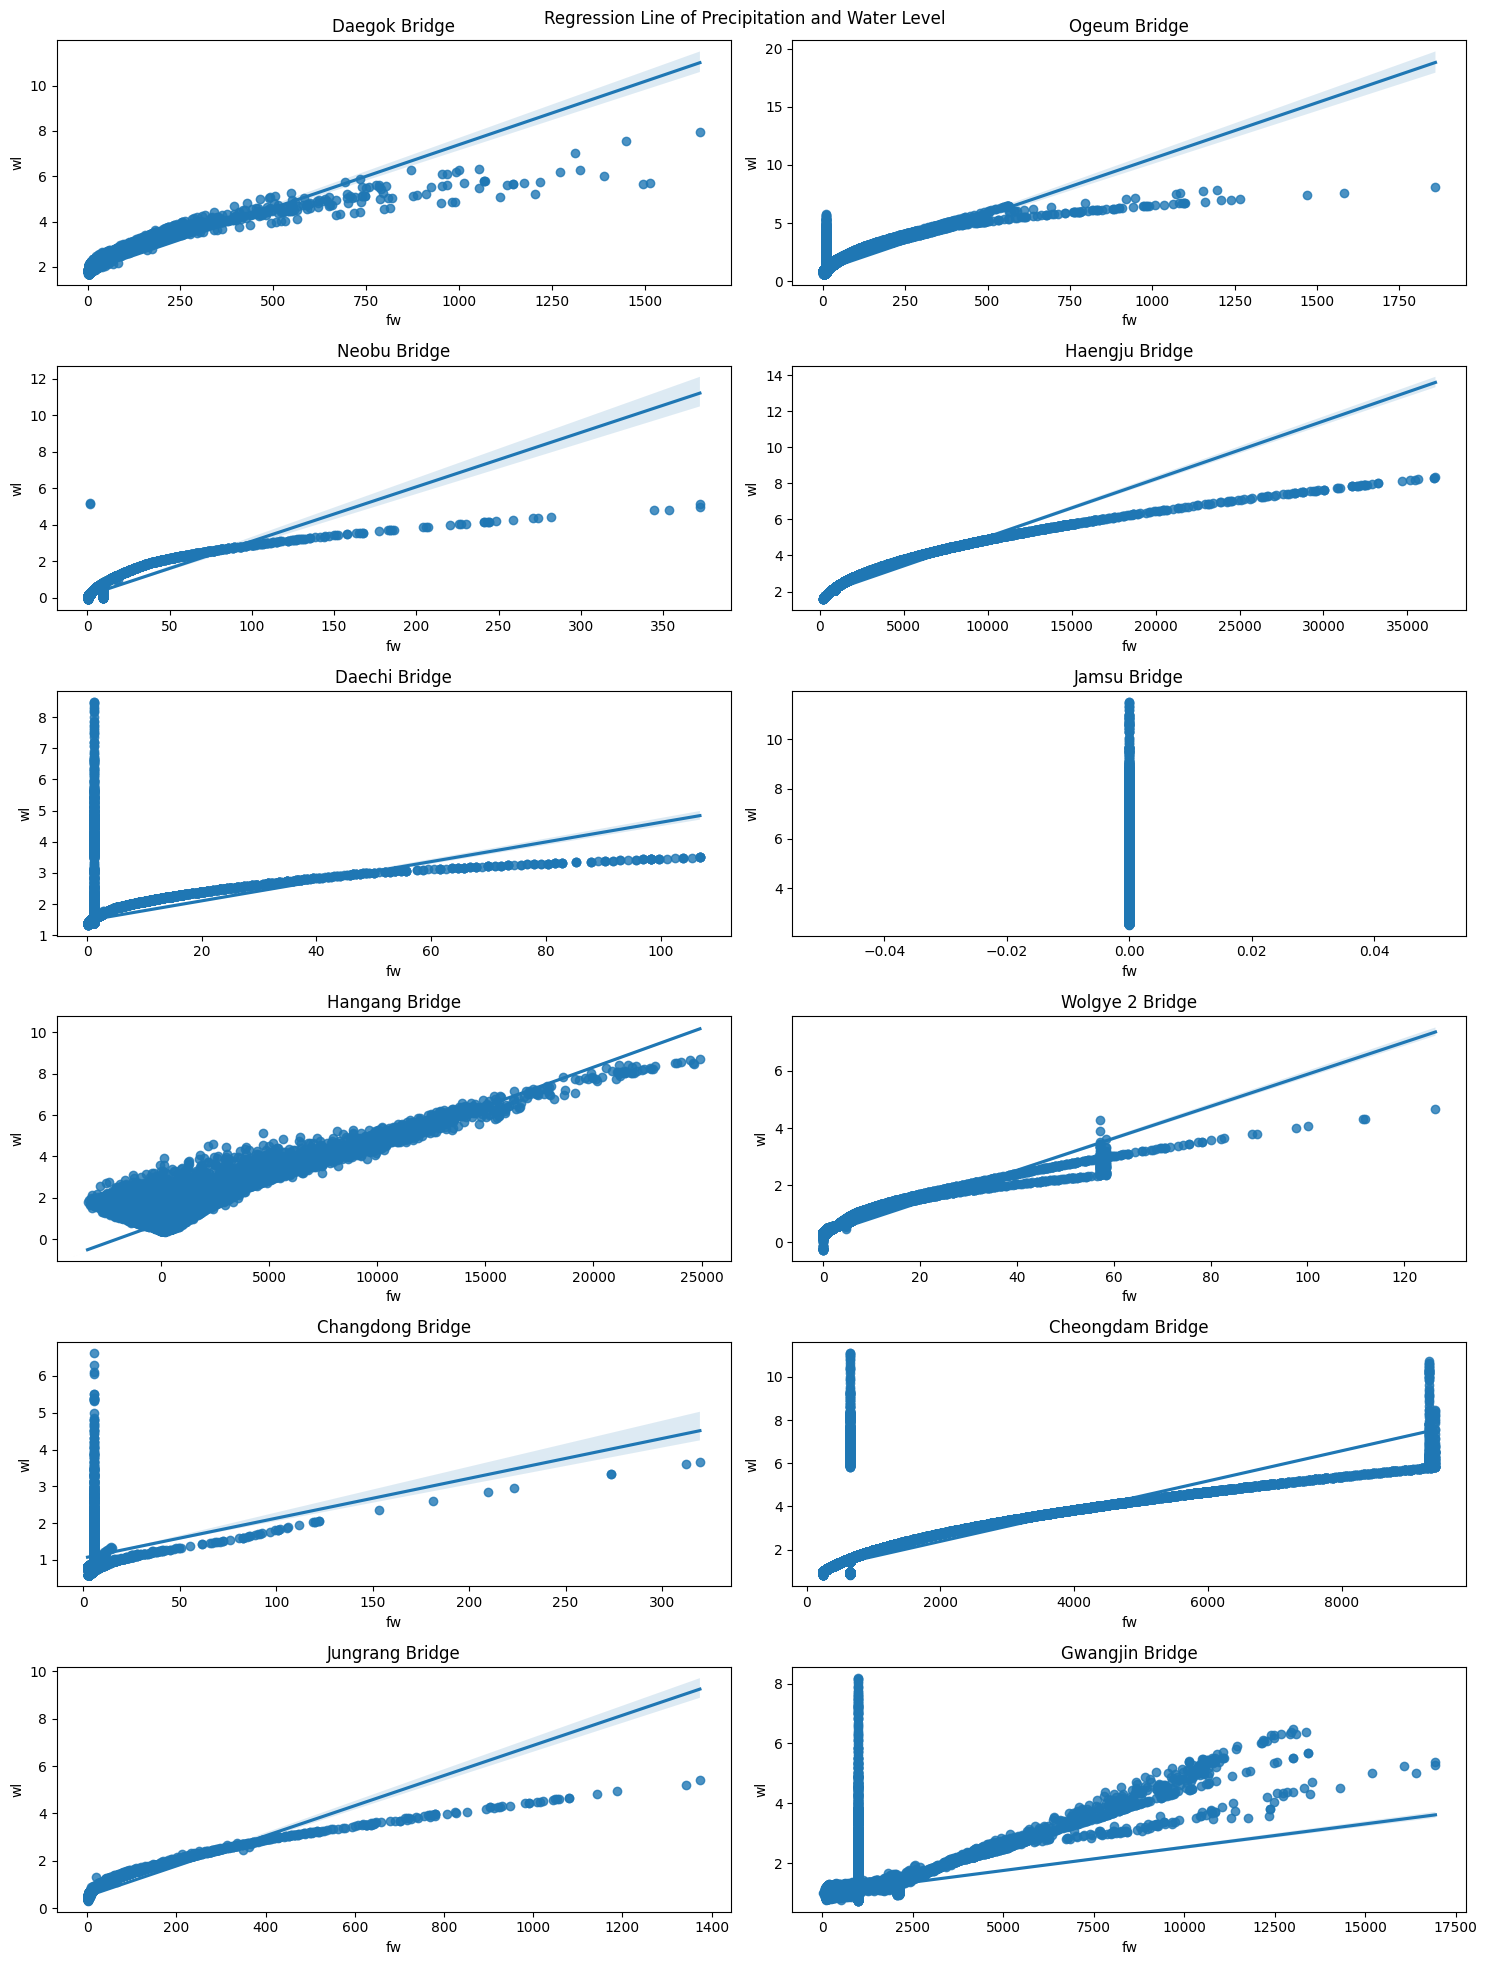

In [ ]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(data['observatory'].unique()):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.regplot(x='fw', y='wl', data=df, ax=axes[row, col])
#     axes[row, col].boxplot(df['level'])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('Regression Line of Precipitation and Water Level')
plt.tight_layout()
plt.show()

Daegok Bridge Complite
Ogeum Bridge Complite
Neobu Bridge Complite
Haengju Bridge Complite
Daechi Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Wolgye 2 Bridge Complite
Changdong Bridge Complite
Cheongdam Bridge Complite
Jungrang Bridge Complite
Gwangjin Bridge Complite


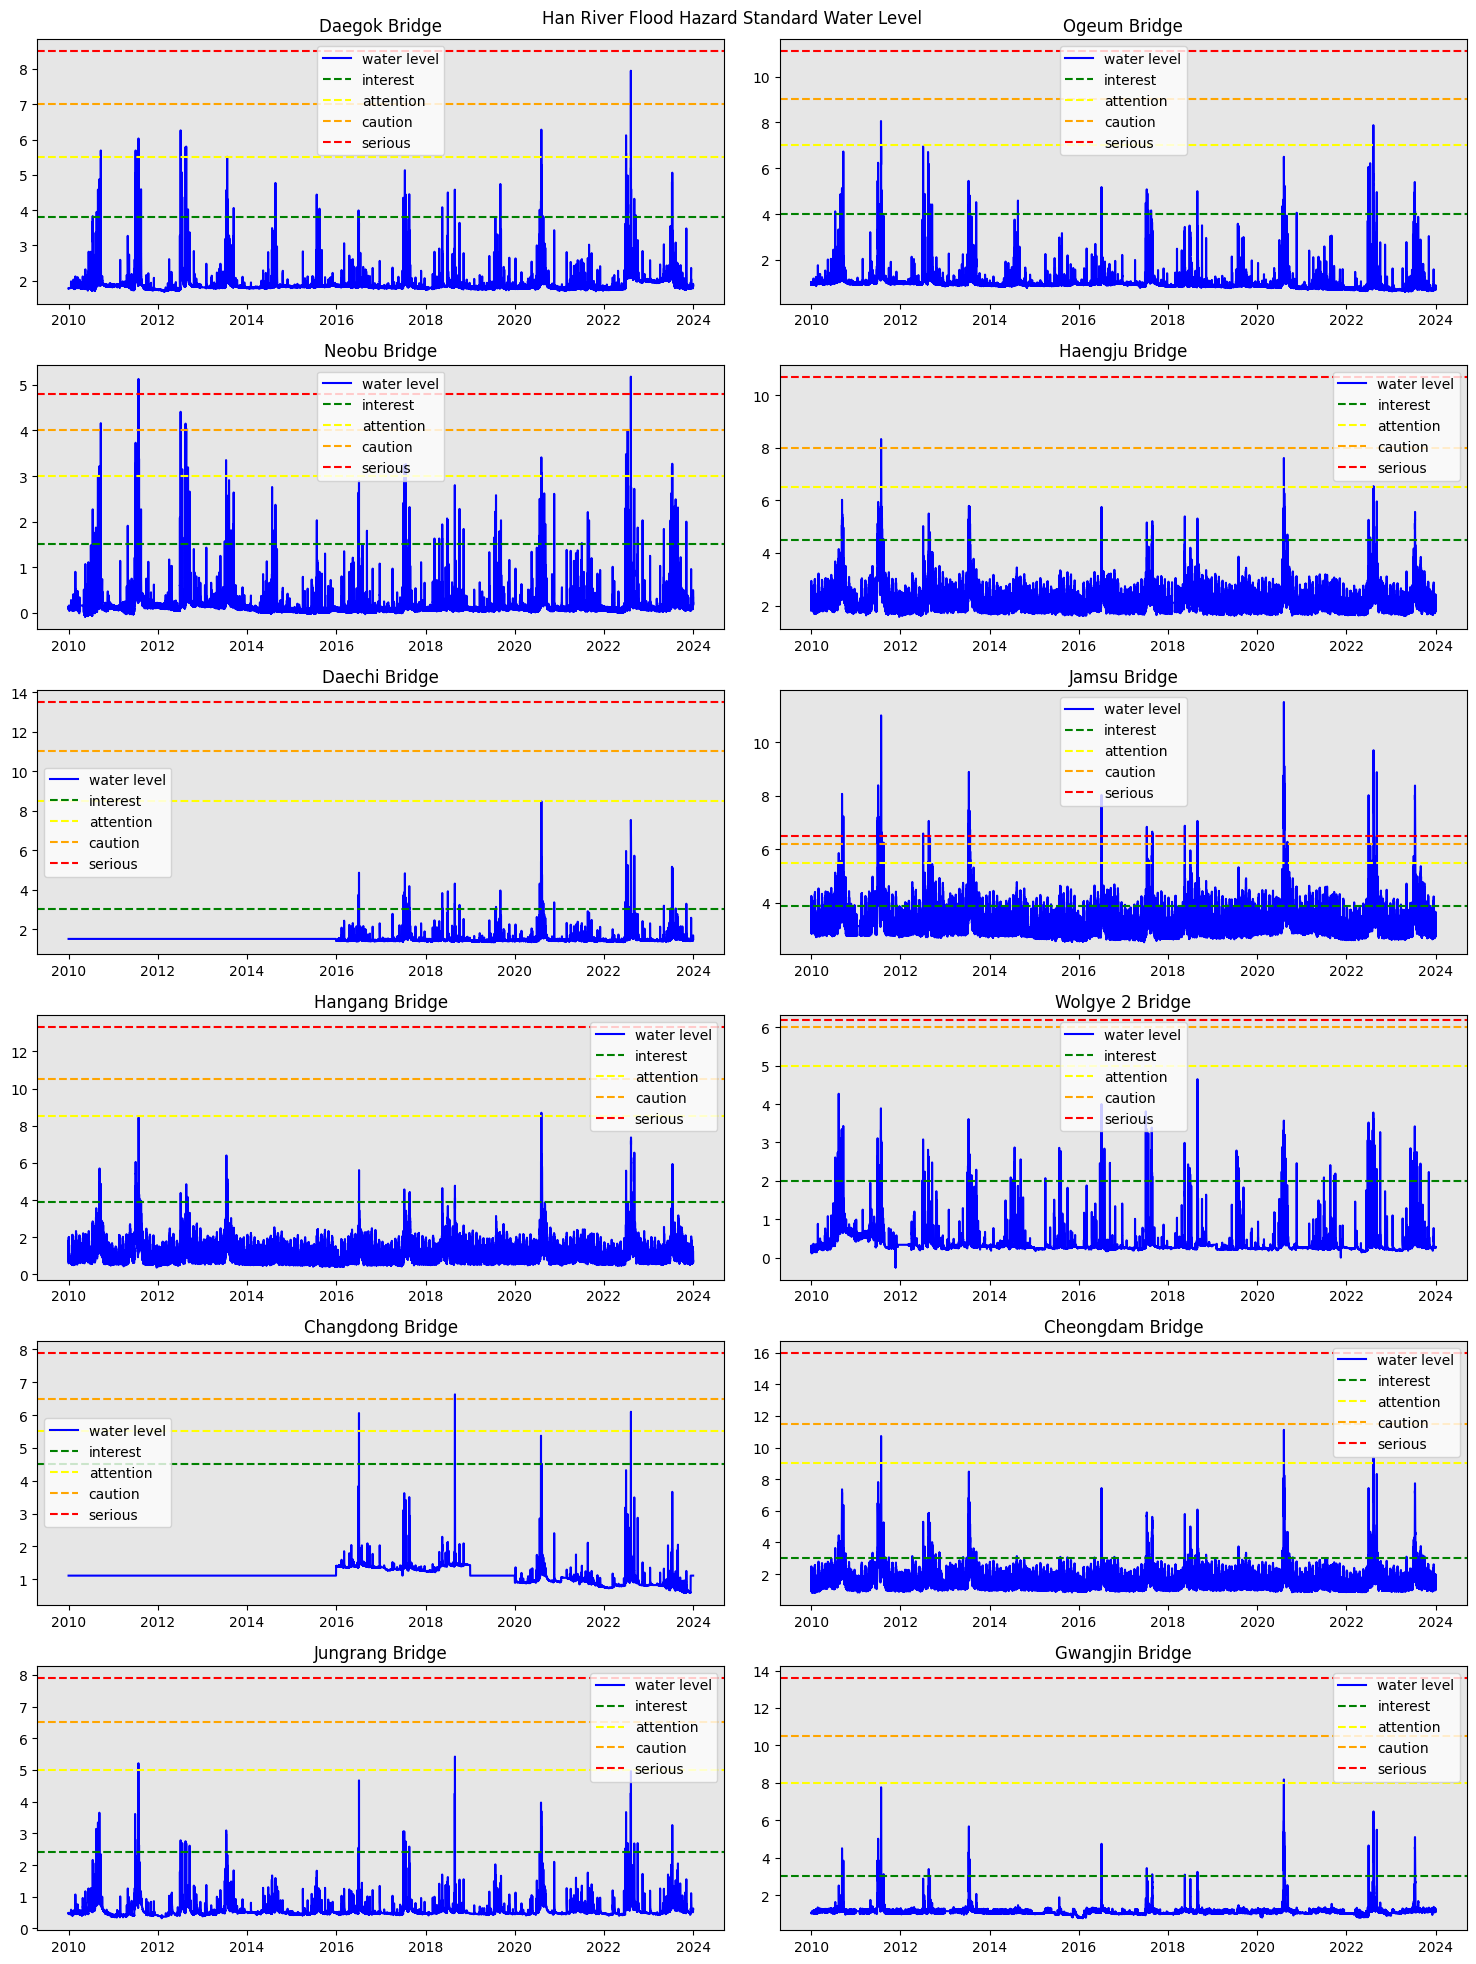

In [ ]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(data['observatory'].unique()):
    row = i // num_cols
    col = i % num_cols

    try:
        df = data[data['observatory'] == bridge]
    except IndexError:
        print(f"No data found for {bridge}. Skipping...")
        continue

    axes[row, col].plot(df['datetime'], df['wl'], label='water level', color='blue')
    axes[row, col].axhline(y=df['interest'].iloc[0], color='green', linestyle='--', label='interest')
    axes[row, col].axhline(y=df['attention'].iloc[0], color='yellow', linestyle='--', label='attention')
    axes[row, col].axhline(y=df['caution'].iloc[0], color='orange', linestyle='--', label='caution')
    axes[row, col].axhline(y=df['serious'].iloc[0], color='red', linestyle='--', label='serious')
    axes[row, col].set_title(bridge)
    axes[row, col].legend()
    axes[row, col].set_facecolor((0.9, 0.9, 0.9))
    print(bridge + ' Complite')

plt.suptitle('Han River Flood Hazard Standard Water Level')
plt.tight_layout()
plt.show()